In [1]:
%pylab inline
import pandas as pd
from mpl_toolkits.mplot3d import axes3d

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib notebook

In [3]:
def readf(file):
    df = pd.read_fwf(file)
    arr = df.to_numpy()
    return arr

In [4]:
def isfloat(num):
    
    try:
        float(num)
        return True
    
    except ValueError:
        return False


In [5]:
def ks(arr,t):
    
    if len(t) == 0:
        sys.exit('Please input a keyword')
    else:
        pass
    
    num = len(arr[:,0])
    ta = []
    for i in range(len(t)):
        ta.append(t[i])
    ta = array(ta)
    ix = arr[:,0]
    nme = arr[:,1]
    ky = arr[:,2]
    sv = arr[:,3]
    
    if len(where(ta == ':')[0])==1:
        if t == ':':
            b = arange(0,num,1)
            
        else:
            c = where(ta == ':')[0][0]
            
            if len(t[0:c])>0:
                A = int(t[0:c])
            else:
                lidx = 0
            
            if len(t[c+1:])>0:
                B = int(t[c+1:])
            else:
                ridx = num 
                   
            if c ==0:
                if len(where(ix == B)[0])==1:
                    ridx = where(ix == B)[0][0]+1
                else:
                    sys.exit('list out of range')
                
            elif c == len(t)-1:
                if len(where(ix == A)[0])==1: 
                    lidx = where(ix == A)[0][0]
                else:
                    sys.exit('list out of range')
                
            else:
                if len(where(arr[:,0] == A)[0])==1 and len(where(arr[:,0] == B)[0])==1:
                    if A<B:
                        lidx = where(ix == A)[0][0]
                        ridx = where(ix == B)[0][0]+1
                    else:
                        sys.exit('the second index must be greater than the first one')
                else:
                    sys.exit('list out of range')
                    
                    
            b = arange(lidx,ridx,1)
                
    else:
        if t.isnumeric() == True:
            if len(where(arr[:,0] == int(t))[0])>0: 
                b  = where(arr[:,0] == int(t))[0]
            else:
                sys.exit('can not find the target element')
                    
        else:
            if len(t)>=2:
                
                if len(where(ta == '*')[0])==1:
                    tse = where(ta == '*')[0][0]
                    keyword = []
                    for i in range(len(nme)):
                            keyword.append(nme[i][0:tse])
                    keyword = array(keyword)
                    
                    if len(where(keyword == t[:-1])[0])>0:
                        b  = where(keyword == t[:-1])[0]
                        
                    else:
                        sys.exit('can not find the target element')
   
                elif 's ' in t and len(where(ta == ' ')[0])==2:
                    n1s = t.find('s ')+2
                    n1e = where(ta == ' ')[0][1]
                    n2s = where(ta == ' ')[0][1]+1
                    n1 = t[n1s:n1e] 
                    n2 = t[n2s:]
                    
                    if len(n1)>0 and len(n2)>0 and isfloat(n1) == True and isfloat(n2) == True:
                        
                        n1 = float(n1)
                        n2 = float(n2) 
                        
                        if n1>=0 and n2>0:
                            if n2 > n1:
                                if n2 <= max(sv)+5:
                                    if len(where(sv >= n1)[0])>0:
                                        A = where(sv >= n1)[0][0]
                                        if len(where(sv <= n2)[0])>0:
                                            B = where(sv <= n2)[0][-1]
                                            if A <= B: 
                                                b = arange(A,B+1,1)
                                            else:
                                                sys.exit('can not find any element in the given s range')
                                        else:
                                            sys.exit('upper boundry too small')
                                    else:
                                        sys.exit('lower boundry too big')
                                else:
                                    sys.exit('upper boundry too big (might exceed the circumference of the ring)')
                                    
                            else:
                                sys.exit('the second number must be greater than the first one')
                            
                        else:
                            sys.exit('s can not be a negative number')
                                
                    else:
                        sys.exit('requires two numbers to scale s')
                    
                    
                else:
                    if len(where(nme == t )[0])>0: 
                        b  = where(nme == t )[0]
                    
                    elif len(where(ky == t)[0])>0: 
                        b  = where(ky == t)[0]
            
                    else:
                        sys.exit('can not find the target element')
            else:
                sys.exit('Keyword too short')
                
    return b

In [6]:
def search_engine(arr,t):
    
    b = ks(arr,t)
    idx = arr[b,0]
    name = arr[b,1]
    key = arr[b,2]
    s  = arr[b,3]
    l = arr[b,4]
    x = arr[b,5]
    y = arr[b,6]
    z = arr[b,7]
    theta = arr[b,8]
    phi = arr[b,9]
    psi = arr[b,10]
    sx = arr[b,11]
    sy = arr[b,12]
    sz = arr[b,13]
    
    return idx, name, key, s, l, x, y, z, theta, phi, psi, sx, sy, sz

In [7]:
def df(idx, name, key, s, l, x, y, z, theta, phi, psi, sx, sy, sz):
    pb=pd.DataFrame({'index':idx, 'name':name, 'key':key, 's (m)':s,\
                     'l (m)':l, 'floor.x':x,'floor.y':y,'floor.z':z,\
                     'floor.theta':theta,'floor.phi':phi,'floor.psi':psi,\
                     'spin.x':sx,'spin.y':sy,'spin.z':sz})
    #pd.set_option('display.max_rows', None)
    display(pb)

In [8]:
def DF(file,t):
    arr = readf(file)
    idx, name, key, s, l, x, y, z, theta, phi, psi, sx, sy, sz = search_engine(arr,t)
    df(idx, name, key, s, l, x, y, z, theta, phi, psi, sx, sy, sz)

In [9]:
def Df(file):
    pb = pd.read_fwf(file)
    display(pd.DataFrame(pb))
    #pd.set_option('display.max_rows', None)

In [10]:
def tp(file, t):
    
    arr = readf(file)
    
    idx, name, key, s, l, x, y, z, theta, phi, psi, sx, sy, sz = search_engine(arr,t)
    
    fig = figure(figsize=(13,11))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.set_xlim([min(z), max(z)])
    ax.set_ylim([min(x),max(x)])
    ax.set_zlim([0, max(y)+0.1])
        
    ax.plot(z, x, y, '-', color='gold',linewidth = 2)
    
    if t == ':' or t == 's 660 1110':
        
        lidx, lname, lkey, ls, ll, lx, ly, lz, ltheta, lphi, lpsi, lsx, lsy, lsz = search_engine(arr,'BV*') 
        ax.scatter(lz, lx, ly, '.', color='blue', label = 'vertical bends')
        ax.text(0, 0,0.2*max(y) , "RFGUN", color='olive', size = 20)
        
        if t == ':':
            ax.scatter(z[0], x[0], y[0], c= 'olive', marker='o',s=50)
            lidx, lname, lkey, ls, ll, lx, ly, lz, ltheta, lphi, lpsi, lsx, lsy, lsz = search_engine(arr,'Lcavity') 
            ax.scatter(lz, lx, ly, '.', color='red', label = 'Lcavity')
            
        else:
            pass
        ax.legend(loc = 'best', fontsize = 20)
    else:
        pass

        
    ax.set_title('KEK Linac', size = 30)
    ax.set_xlabel('Z [m]',fontsize=15)
    ax.set_ylabel(r'X [m]',fontsize=15)
    ax.set_zlabel(r'Y [m]',fontsize=15)
    show()

<IPython.core.display.Javascript object>


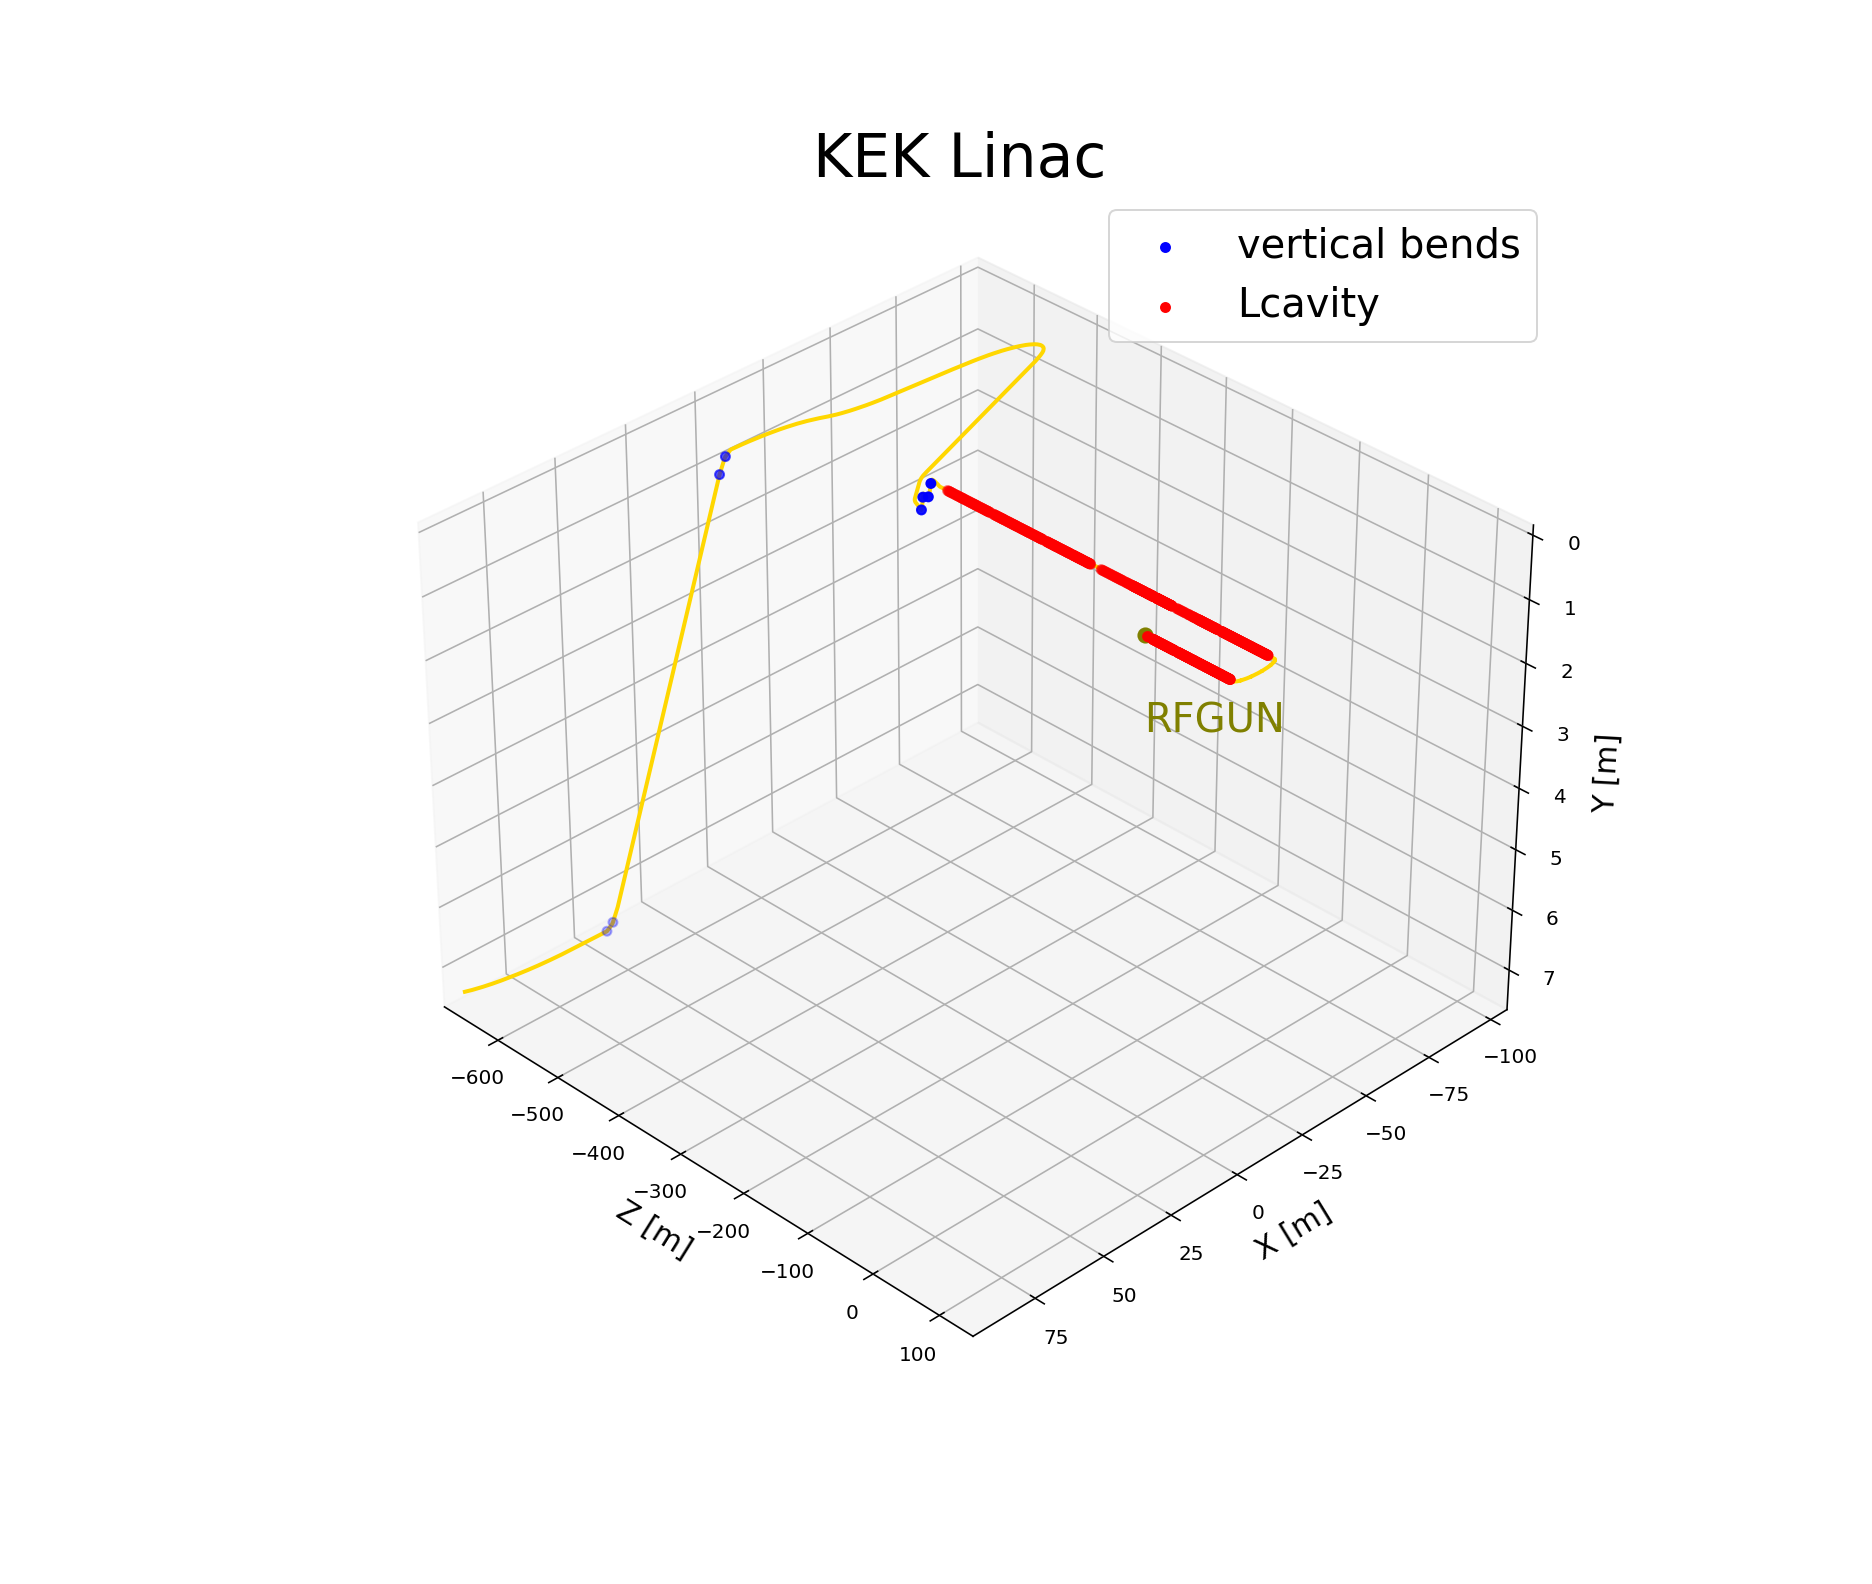

In [11]:
tp('Linac.txt',':')  

In [12]:
def sp(file,t):
    arr = readf('Linac.txt')
    idx, name, key, s, l, x, y, z, theta, phi, psi, sx, sy, sz = search_engine(arr,t)
    
    figure(figsize=(10, 8))
    plot(s,sx,'b-',label = r'$S_x$')
    plot(s,sy,'g-',label = r'$S_y$')
    plot(s,sz,'r-',label = r'$S_z$')

    xlabel('s(m)',size = 20)
    ylabel('Spin Component',size = 20)
    #title(r'Spin Motion of $e ^ - %s$ (Co-Moving Frame) in the Linac',size =20)
    legend(loc='best', fontsize = 15)
    show()  

<IPython.core.display.Javascript object>


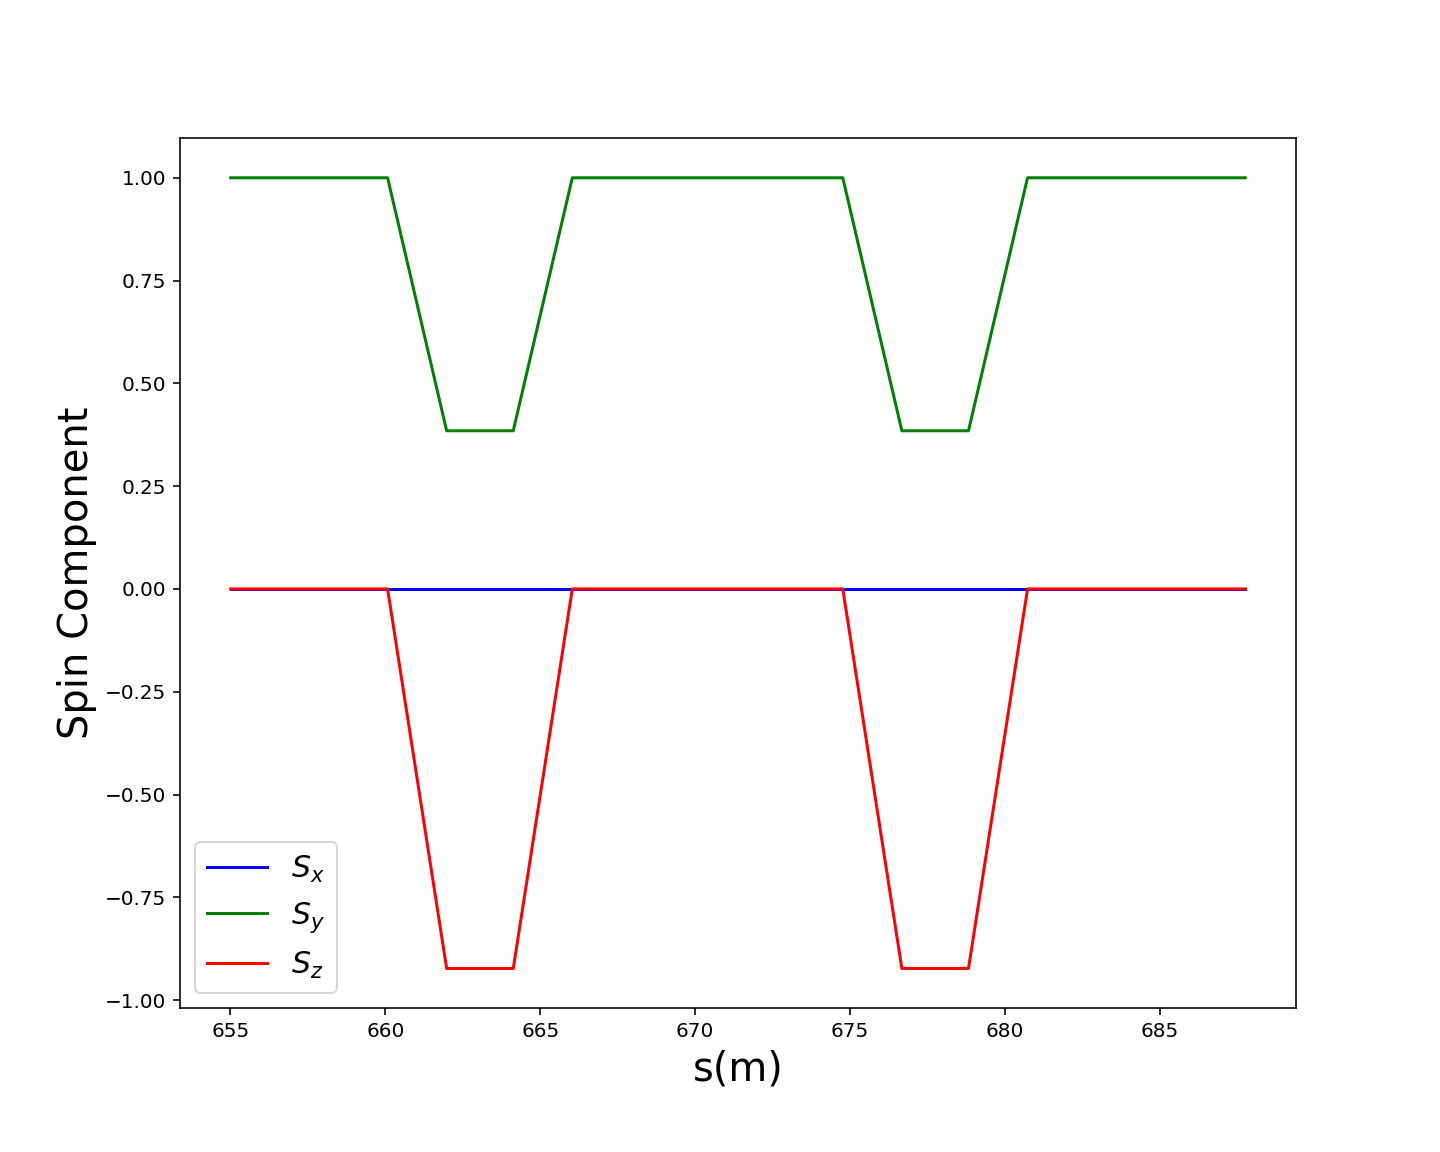

In [13]:
sp('Linac.txt','s 655 690')

In [14]:
DF('Linac.txt','Sbend')

,index,name,key,s (m),l (m),floor.x,floor.y,floor.z,floor.theta,floor.phi,floor.psi,spin.x,spin.y,spin.z
0,14,BXA1G,Sbend,1.277,0.000,0,0,1.277,0,0,0,0,1,0
1,15,BYA1G,Sbend,1.277,0.000,0,0,1.277,0,0,0,0,1,0
2,31,SXA11,Sbend,3.037,0.000,0,0,3.0365,0,0,0,0,1,0
3,32,SYA11,Sbend,3.037,0.000,0,0,3.0365,0,0,0,0,1,0
4,49,BMA1C1,Sbend,5.383,0.147,-0.0117979,0,5.38194,-0.160588,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,4348,VM28E,Sbend,1101.45,0.200,88.6223,7.40949,-667.682,-3.84069,0,0,0,1,-0
366,4360,SE4,Sbend,1103.87,1.000,90.1666,7.40949,-669.547,-3.80423,0,0,0,1,-0
367,4362,SE3,Sbend,1105.29,1.000,91.0257,7.40949,-670.677,-3.76777,0,0,0,1,-0
368,4364,SE2,Sbend,1106.71,1.000,91.8426,7.40949,-671.839,-3.73027,0,0,-0,1,-0


In [15]:
Df('vertical_bend.txt')

,Index,name,key,s(m),l(m),REF_TILT_TOT,B_field,floor.y,spin.x,spin.y,spin.z
0,3499,BV1UE,Sbend,661.981,1.906,-1.5708,-0.90687,0.070517,-5.656700e-16,0.38464,-9.230700e-01
1,3505,BV1DE,Sbend,666.036,1.906,1.5708,-0.90687,0.300000,-4.302700e-16,1.00000,7.612600e-16
2,3538,BV1UE,Sbend,676.670,1.906,-1.5708,-0.90687,0.370520,1.266100e-15,0.38464,-9.230700e-01
3,3544,BV1DE,Sbend,680.726,1.906,1.5708,-0.90687,0.600010,1.398400e-15,1.00000,-1.354100e-17
4,4134,BV2UE,Sbend,1006.619,1.906,-1.5708,-0.91564,0.671210,2.237800e-15,0.37411,-9.273800e-01
5,4139,BV2UE,Sbend,1008.875,1.906,-1.5708,-0.91564,0.910540,2.627600e-15,-0.72008,-6.938900e-01
6,4219,BV2DE,Sbend,1052.333,1.906,1.5708,-0.91564,7.312200,2.435100e-15,0.37411,-9.273800e-01
7,4224,BV2DE,Sbend,1054.589,1.906,1.5708,-0.91564,7.409500,2.182700e-15,1.00000,-4.510300e-16
